# Un exemple de série

Bienvenue dans cette feuille de calcul Jupyter, qui va nous permettre d'explorer numériquement la convergence de la série
$$ \sum_{n \geq 1} \frac{1}{n(n+1)}. $$
Notez que cette cellule contient du _Markdown_ et du $\LaTeX$, n'hésitez pas à double-cliquer dessus pour l'éditer.

## Calcul numérique de sommes partielles

Il est facile de calculer une somme partielle de la série
$$ S_N = \sum_{n = 1}^N \frac{1}{n(n+1)} $$
à l'aide d'une boucle.

In [2]:
S = 0.  # attention de bien travailler en flottants et non en fraction exactes

for n in [1..100]:
    
    S += 1/n/(n+1)
    
S  # S_100

0.990099009900990

Si la série converge, il s'agit vraisemblablement d'une bonne approximation de sa somme. Mais:

- à quel point est-elle bonne ? que peut-on dire sur l'erreur commise ?

ou, si on renverse la question

- est-ce que 100 termes sont suffisants pour avoir une bonne approximation ? est-ce que c'est trop ?

## Affichage des sommes partielles

Pour y voir plus clair, observons les premiers termes de la suite des sommes partielles que nous stockons dans une liste:

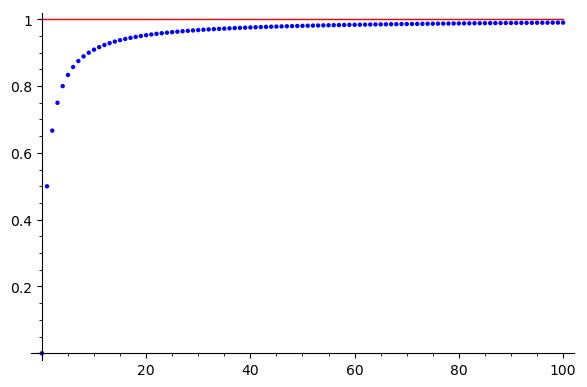

In [30]:
S = 0.

sommes_partielles = [ S ]

N = 2000 # on calcule les 2000 premières sommes partielles

for n in [1..N]:
    
    S += 1/n/(n+1)
    sommes_partielles.append(S)
    
# on n'affiche que les 100 premières

list_plot(sommes_partielles[:101]) + plot(1, (0,100), color='red')

La suite des sommes partielles _semble_ converger vers $1$... Peut-on s'en convaincre ?

Il s'agit d'un exemple de série télescopique pour laquelle on montre que
$$ S_N = \sum_{n=1}^N \frac{1}{n(n+1)} = 1 - \frac{1}{N+1} \qquad \text{(n'est-ce pas ?)}. $$

D'une part, cela permet de se convaincre que $S_N \to 1$ quand $N \to +\infty$ et donc d'affirmer que la série qui nous intéresse est convergente de somme $S = 1$; d'autre par on peut écrire cette somme $S$ sous la forme
$$ S = S_N + \frac{1}{N+1}, $$
ce qui nous permet d'identifier le reste d'ordre $N$ de la série:
$$ R_N = \frac{1}{N+1}. $$

En d'autre termes, si on remplace la somme de la série par sa somme partielle $S_N$, l'erreur commise est $R_N$ et on peut garantir que celle-ci soit petite en prenant $N$ suffisamment grand.

## Approximation numérique de la somme à une précision souhaitée

Par exemple, si on veut une approximation de la somme $S$ qui soit valable au millième près, on veut
$$ |S - S_N| = |R_N| \leq \frac{1}{1000}. $$

En y regardant bien on voit qu'il suffit pour cela de choisir $N + 1 \geq 1000$ donc $N \geq 999$.

Vérifions:

In [21]:
sommes_partielles[998]  # pas assez loin

0.998998998999000

In [22]:
sommes_partielles[999]  # ok

0.999000000000001